In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import geocoder
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("../project-data/cleaned_train.csv")
test = pd.read_csv("../project-data/cleaned_test.csv")

In [4]:
train.columns

Index(['Street', 'From', 'To', 'Date', 'Time', 'Real.Spots', 'Street.Length',
       'any_spot', 'street_from', 'street_to', 'coord_from', 'coord_to',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Hour', 'Year', 'Month',
       'Weekday', 'Holiday', 'block_id', 'block_group'],
      dtype='object')

In [13]:
#get avg spot by block group
mean_st = pd.DataFrame(train.groupby(['block_group'])['Real.Spots'].mean()).reset_index()
mean_st

,block_group,Real.Spots
0,23rd StreetBartlett StreetValencia Street,1.117647
1,23rd StreetMission StreetBartlett Street,1.157895
2,23rd StreetMission StreetCapp Street,1.736842
3,23rd StreetSouth Van Ness AvenueCapp Street,14.619048
4,Battery StreetCalifornia StreetPine Street,0.833333
5,Battery StreetHalleck StreetCalifornia Street,1.400000
6,Battery StreetWashington StreetMerchant Street,1.600000
7,Bryant StreetMariposa Street17th Street,3.666667
8,Bush StreetParking Entrance LaneChatham Place,0.333333
9,Bush StreetTaylor StreetMason Street,1.214286


(array([ 66.,  20.,   5.,   1.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([  0.        ,   1.46190476,   2.92380952,   4.38571429,
          5.84761905,   7.30952381,   8.77142857,  10.23333333,
         11.6952381 ,  13.15714286,  14.61904762]),
 <a list of 10 Patch objects>)

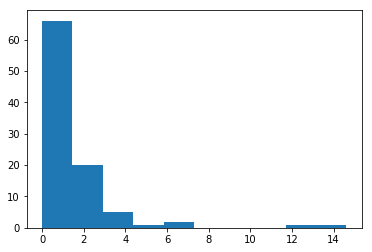

In [17]:
plt.hist(mean_st['Real.Spots'])

In [23]:
#convert mean to a pred
mean_st['pred'] = np.where(mean_st['Real.Spots']>=.8, 1, 0)
mean_st

,block_group,Real.Spots,pred
0,23rd StreetBartlett StreetValencia Street,1.117647,1
1,23rd StreetMission StreetBartlett Street,1.157895,1
2,23rd StreetMission StreetCapp Street,1.736842,1
3,23rd StreetSouth Van Ness AvenueCapp Street,14.619048,1
4,Battery StreetCalifornia StreetPine Street,0.833333,1
5,Battery StreetHalleck StreetCalifornia Street,1.400000,1
6,Battery StreetWashington StreetMerchant Street,1.600000,1
7,Bryant StreetMariposa Street17th Street,3.666667,1
8,Bush StreetParking Entrance LaneChatham Place,0.333333,0
9,Bush StreetTaylor StreetMason Street,1.214286,1


In [24]:
#create a dictionary of black group and street
d = dict(zip(mean_st.block_group,mean_st.pred))

In [25]:
d

{'23rd StreetBartlett StreetValencia Street': 1,
 '23rd StreetMission StreetBartlett Street': 1,
 '23rd StreetMission StreetCapp Street': 1,
 '23rd StreetSouth Van Ness AvenueCapp Street': 1,
 'Battery StreetCalifornia StreetPine Street': 1,
 'Battery StreetHalleck StreetCalifornia Street': 1,
 'Battery StreetWashington StreetMerchant Street': 1,
 'Bryant StreetMariposa Street17th Street': 1,
 'Bush StreetParking Entrance LaneChatham Place': 0,
 'Bush StreetTaylor StreetMason Street': 1,
 'Columbus AvenueKearny StreetPacific Avenue': 0,
 'Geary StreetJones StreetGeary Street': 1,
 'Geary StreetLarkin StreetPolk Street': 1,
 'Geary StreetLeavenworth StreetHyde Street': 1,
 'Grove StreetDr Carlton P Goodlett PlaceLarkin Street': 1,
 'Grove StreetDr Carlton P Goodlett PlaceVan Ness Avenue': 1,
 'Hyde StreetGolden Gate AvenueMcAllister Street': 1,
 'Jackson StreetPolk StreetVan Ness Avenue': 1,
 'Jessie StreetNew Montgomery StreetAnnie Street': 0,
 'Jones StreetAntonio StreetEllis Street':

In [26]:
#map prediction to test set 
test['any_spot'] = test['block_group'].map(d)

In [27]:
df = pd.DataFrame(test['any_spot'])
df.index = df.index+1
df = df.reset_index()
df.columns = ["id","any_spot"]
df
df.to_csv("st_from_to_mean_using_real_spot.csv", index=False)